In [1]:
import pandas as pd
import numpy as nm
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model

In [2]:

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.naive_bayes import GaussianNB

In [3]:
df=pd.read_csv('insurance_data.csv')

In [4]:
df


,age,bought_insurance
0,22,0
1,25,0
2,47,1
3,52,0
4,46,1
5,56,1
6,55,0
7,60,1
8,62,1
9,61,1


df

In [5]:
df["bought_insurance"]=df["bought_insurance"].map({1:'yes', 0:'no'})
df["bought_insurance"].value_counts()


yes    14
no     13
Name: bought_insurance, dtype: int64

Text(0.5, 1.0, 'Buy or Not')

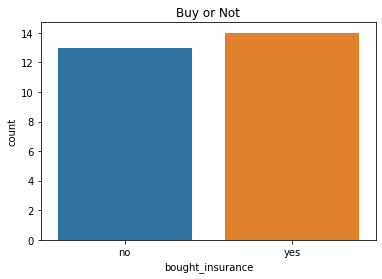

In [6]:
b = sns.countplot(x='bought_insurance', data=df)
b.set_title("Buy or Not")

C:\Users\vishal\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


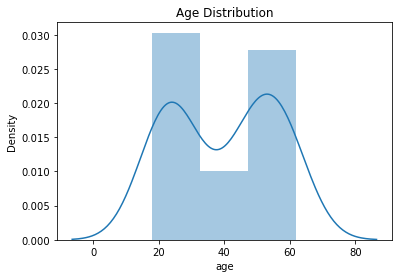

In [7]:
b = sns.distplot(df['age'])
b.set_title("Age Distribution");

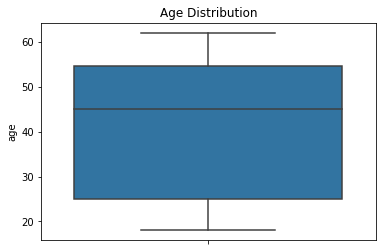

In [8]:
b = sns.boxplot(y = 'age', data = df)
b.set_title("Age Distribution");

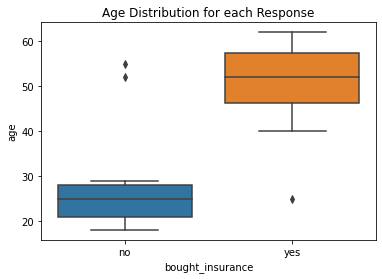

In [9]:
b = sns.boxplot(y='age', x='bought_insurance', data=df);
b.set_title("Age Distribution for each Response");

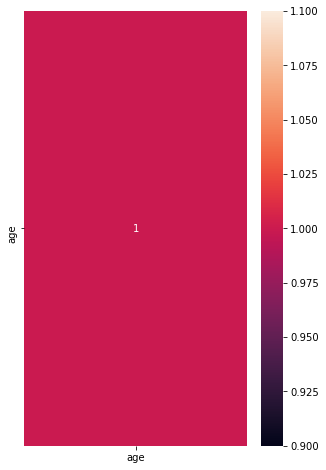

In [11]:
plt.figure(figsize=(5,8))
cor = df.corr()
sns.heatmap(cor, annot=True)
plt.show()

In [12]:
from sklearn.model_selection import train_test_split

In [14]:
X_train,X_test,y_train,y_test=train_test_split(df.drop('bought_insurance',axis=1),
                                               df['bought_insurance'],test_size=0.30,
                                               random_state=101)

In [15]:
from sklearn.linear_model import LogisticRegression

In [16]:
logmodel=LogisticRegression(max_iter=1000)
logmodel.fit(X_train,y_train)

LogisticRegression(max_iter=1000)

In [17]:
predictions=logmodel.predict(X_test)

In [18]:
from sklearn.metrics import confusion_matrix

In [19]:
accuracy=confusion_matrix(y_test,predictions)

In [20]:
accuracy

array([[3, 1],
       [0, 5]], dtype=int64)

In [21]:
from sklearn.metrics import accuracy_score

In [22]:
accuracy=accuracy_score(y_test,predictions)
accuracy

0.8888888888888888

In [23]:
import joblib

In [25]:
joblib.dump(logmodel,'insurance.pkl')

['insurance.pkl']